In [236]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df=pd.read_csv('distance_matrix.csv', sep=',',header=None)
df1 = pd.read_csv('flows.csv', sep=',',header=None).fillna(0)
header = df1.iloc[0]
df1 = df1.iloc[1:79]
df1.columns = header
df

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,1.800000,0.666667,1.498147,8.766472,10.063652,11.911945,13.204208,14.455084,16.408670,2.001111,...,16.921518,13.572562,15.609575,17.148294,16.942806,17.621325,17.189379,17.796192,18.800030,19.235581
1,0.666667,1.039230,1.800000,9.346715,10.458548,12.300000,13.601471,14.850758,16.800000,2.473863,...,17.588127,14.100000,16.180433,17.764277,17.590381,18.283326,17.757824,18.439631,19.446594,19.890277
2,1.498147,1.800000,0.600000,7.747259,8.658840,10.500000,11.801695,13.050862,15.000000,0.848528,...,16.551200,14.214429,16.080000,17.391795,16.956619,17.447063,17.662540,17.844327,18.816216,19.164371
3,8.766472,9.346715,7.747259,9.429740,4.212390,5.447986,6.304342,7.378534,9.174853,6.930209,...,10.281219,13.274989,13.899694,13.853433,12.339766,11.922093,15.289167,13.297190,14.029774,13.954029
4,10.063652,10.458548,8.658840,4.212390,1.587451,1.850813,3.142987,4.392909,6.345173,8.068533,...,13.764676,17.417145,18.111564,18.004544,16.347703,15.679051,19.499636,17.298260,17.957325,17.758420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,17.621325,18.283326,17.447063,11.922093,15.679051,16.101242,16.208640,16.638660,17.532826,16.651727,...,2.415689,9.355747,7.405295,4.861022,2.244921,1.039230,7.594426,2.641969,2.640076,2.093591
74,17.189379,17.757824,17.662540,15.289167,19.499636,20.528707,21.054579,21.817718,23.148225,17.071769,...,9.645856,4.008468,1.582944,2.743657,5.363342,7.594426,2.400000,5.093654,5.767392,6.940033
75,17.796192,18.439631,17.844327,13.297190,17.298260,17.932373,18.179659,18.721779,19.759049,17.102631,...,4.972145,7.523962,5.201000,2.363690,0.958046,2.641969,5.093654,1.200000,1.063015,2.019437
76,18.800030,19.446594,18.816216,14.029774,17.957325,18.506756,18.689302,19.173549,20.125854,18.064606,...,5.054921,8.497058,6.078849,3.147147,1.860263,2.640076,5.767392,1.063015,1.469694,1.176063


In [237]:
#initial populaiton of where people live and how many are in each zone
P = vec.iloc[:,0]
P = pd.to_numeric(P)
P = pd.Series(P).to_numpy()

In [238]:
#Where people work and how many per zone
A = vec.iloc[:,1]
A = pd.to_numeric(A)
A = pd.Series(A).to_numpy()

In [239]:
#np.size(A)
print(np.sum(P))
print(np.sum(A))

375072
375073


In [240]:
#distance matrix? with diagonals representing the average distance traveled to get to zone center
D = DM

In [241]:
# Gravity model - given A, we want A^* to be used so sum_i T_ij = A_j
# A_j is the total trip attraction at zone j
#P_i = total trip production at zone i
#T_ij is the trips produced at I and attracted to j
#F_ij is the calibration term for interchange ij also known as the friction factor or tracel time factor

dims = A.shape[0]
A = A.reshape(dims, 1)
P = P.reshape(dims, 1)

def calculate_T(A, P, D):
    # invert and square for disutility
    F = np.power(D,-2)
    T = np.zeros_like(D)
    
    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            denom = F[i,:] @ A
            T[i,j] = P[i]*F[i,j]*A[j]/denom
    
    return T
    
def calculate_A_star(A, P, D):
    A_old = A.copy()
    C = np.ones_like(A)
    eps = 1e1
    n = A.shape[0]
    
    while (np.linalg.norm(C-A) > eps):
        T = calculate_T(A_old, P, D)
        C = T.sum(axis=0).reshape(n,1)
        
        for j in range(n):
            if C[j] != 0:
                A_old[j] = A[j]*A_old[j] / C[j]
        
    return A_old
    
A_star = calculate_A_star(A, P, D)
T = calculate_T(A_star, P, D)

print(T.sum(axis=0)) # should equal A
print(T.sum(axis=1)) # should equal P

[    0.             0.             0.         20000.83072619
     0.          3691.87559059     0.             0.
     0.             0.             0.             0.
     0.          5537.35652514     0.             0.
     0.             0.             0.             0.
     0.          5537.15781195  7384.96046057     0.
     0.             0.             0.          5537.59221025
     0.             0.             0.         59594.41434532
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.         59599.88952283     0.
     0.         52141.53494795     0.             0.
     0.             0.             0.             0.
     0.             0.          5538.32259401     0.
 52145.43651462  3691.73878001     0.             0.
     0.          9230.4393026      0.             0.
     0.             0.             0.          9230.5347726
     0.             0.          9229.98264313     0.
     0.        

In [242]:
print(T)
print(np.shape(T))
np.sum(T)

[[  0.           0.           0.         ...  22.92451799   0.
  350.36323139]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]
(78, 78)


375072.0

In [243]:
N = np.unravel_index(np.argsort(D.ravel()), np.shape(D))
print(N)

(array([64, 62, 16, ..., 11, 74,  8]), array([62, 64, 17, ..., 74,  8, 74]))


In [244]:
y = np.zeros(np.size(T))
y_dens = np.zeros(np.size(T))
x = np.zeros(np.size(T))
for i in range(np.size(T)):
    if i == 0:
        y[i] = T[N[0][i], N[1][i]]
    else:
        y[i] = y[i-1] + T[N[0][i], N[1][i]]
        y_dens[i] = T[N[0][i], N[1][i]]
    x[i] = D[N[0][i], N[1][i]]
print(y)
print(x)
    

[     0.      0.      0. ... 375072. 375072. 375072.]
[ 0.18294641  0.18294641  0.56568542 ... 22.24613028 23.14822482
 23.14822482]


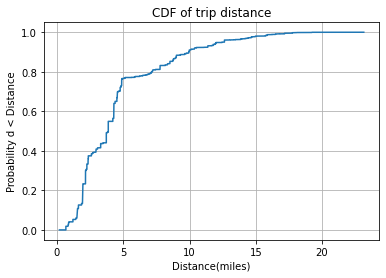

In [245]:
plt.plot(x,y/max(y))
plt.xlabel('Distance(miles)')
plt.ylabel('Probability d < Distance')
plt.title("CDF of trip distance")
plt.grid()

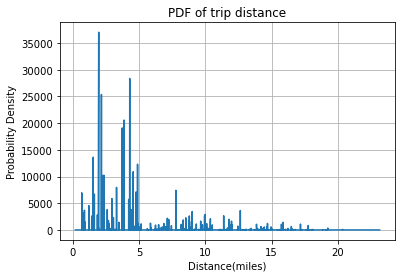

In [234]:
plt.plot(x,y_dens)
plt.xlabel('Distance(miles)')
plt.ylabel('Probability Density')
plt.title("PDF of trip distance")
plt.grid()